In [1]:
import numpy as np 
from Environment import Easy21
import matplotlib.pyplot as plt
from utils import *

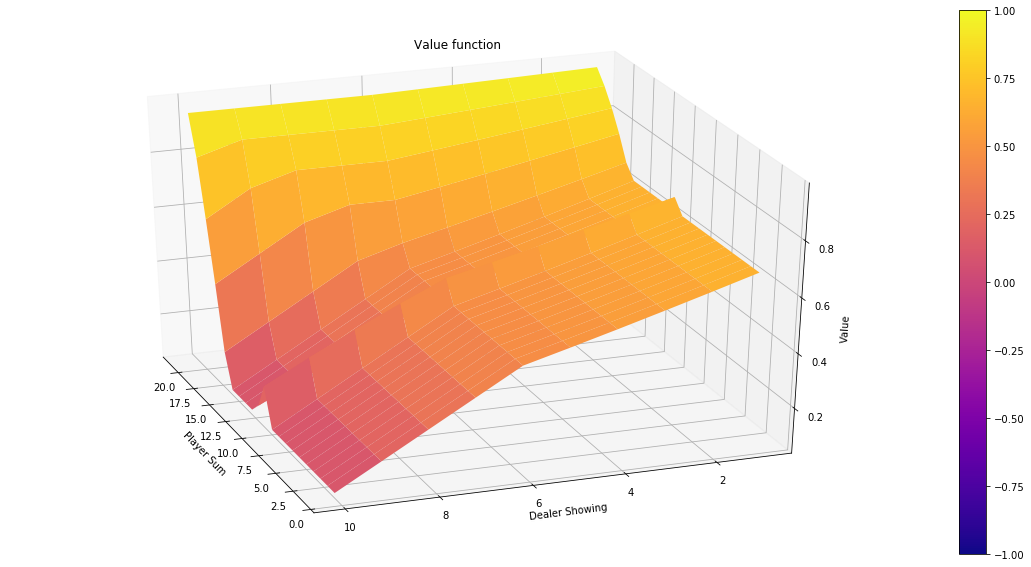

In [2]:
iterations = 1000
value_function = value_iteration(iterations)
plt.clf()
plot_value_function(value_function, plt.cm.plasma, degree = -200)

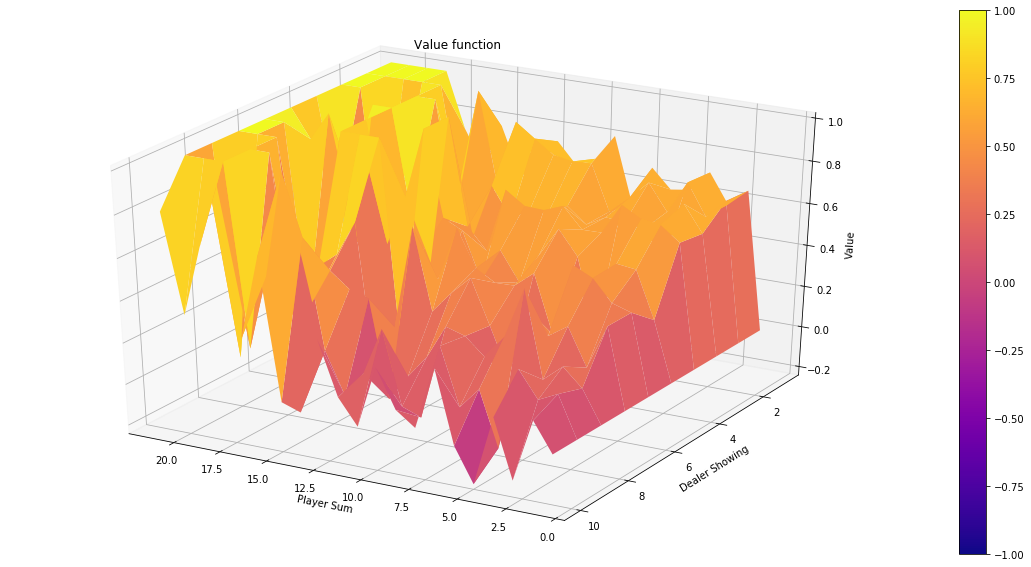

In [6]:
N0 = 100
iterations = int(1e4)
discount_factor = 1

A_V, deltas= montecarlo(iterations, N0, discount_factor, value_function)
plot_value_function(get_value(A_V), degree = 120,cm = plt.cm.plasma)


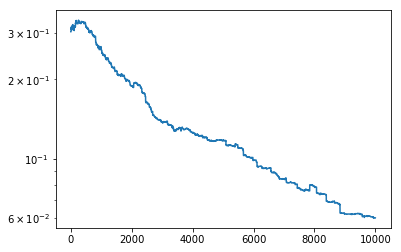

In [7]:
plt.plot([i for i in range(iterations)], deltas)
plt.yscale("log")
plt.show()